# Features importance

The methode *features_importance* displays a bar chart representing the<br />
sum of absolute contribution values of each feature.

This method also makes it possible to represent this sum calculated <br />
on a subset and to compare it with the total population

<b>This short tutorial </b>presents the different parameters you can use.

Content :
- Classification case: Specify the target modality to display.
- selection parameter to display a subset
- max_features parameter limits the number of features 

We used Kaggle's [Titanic](https://www.kaggle.com/c/titanic/data) dataset

In [1]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

## Building Supervized Model 

Load Titanic data

In [2]:
from shapash.data.data_loader import data_loading
titanic_df, titanic_dict = data_loading('titanic')
del titanic_df['Name']
y_df=titanic_df['Survived'].to_frame()
X_df=titanic_df[titanic_df.columns.difference(['Survived'])]

In [3]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,Third class,male,22.0,1,0,7.25,Southampton,Mr
2,1,First class,female,38.0,1,0,71.28,Cherbourg,Mrs
3,1,Third class,female,26.0,0,0,7.92,Southampton,Miss
4,1,First class,female,35.0,1,0,53.10,Southampton,Mrs
5,0,Third class,male,35.0,0,0,8.05,Southampton,Mr


Load Titanic data

In [4]:
from category_encoders import OrdinalEncoder

categorical_features = [col for col in X_df.columns if X_df[col].dtype == 'object']

encoder = OrdinalEncoder(
    cols=categorical_features,
    handle_unknown='ignore',
    return_df=True).fit(X_df)

X_df=encoder.transform(X_df)

Train / Test Split + model fitting

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, train_size=0.75, random_state=7)

In [6]:
clf = ExtraTreesClassifier(n_estimators=200, random_state=79).fit(Xtrain,ytrain['Survived'])

#### First step: You need to Declare and Compile SmartExplainer 

In [7]:
from shapash import SmartExplainer

In [8]:
response_dict = {0: 'Death', 1:' Survival'}

In [9]:
xpl = SmartExplainer(
    model=clf,
    preprocessing=encoder,      # Optional: compile step can use inverse_transform method
    features_dict=titanic_dict, # Optional parameters
    label_dict=response_dict    # Optional parameters, dicts specify labels 
) 

In [10]:
xpl.compile(x=Xtest, y_target=ytest)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7f3f2fd5b730>


## Display Feature Importance


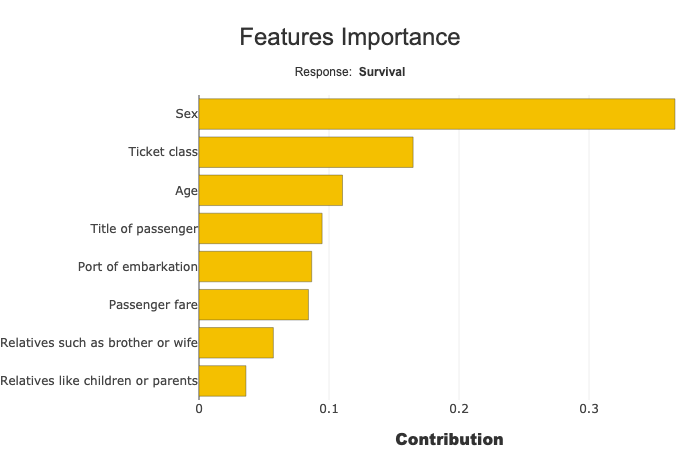

In [11]:
xpl.plot.features_importance()

## Multiclass: Select the target modality

Features importances sum and display the absolute contribution for one target modality.<br />
you can change this modality, selecting with *label* parameter: <br />

<b>xpl.plot.features_importance(label='Death')</b><br />

with label parameter you can specify target value, label or number 

## Focus and compare a subset

selection parameter specify the subset:

In [12]:
sel = [581, 610, 524, 636, 298, 420, 568, 817, 363, 557,
       486, 252, 390, 505, 16, 290, 611, 148, 438, 23, 810,
       875, 206, 836, 143, 843, 436, 701, 681, 67, 10]

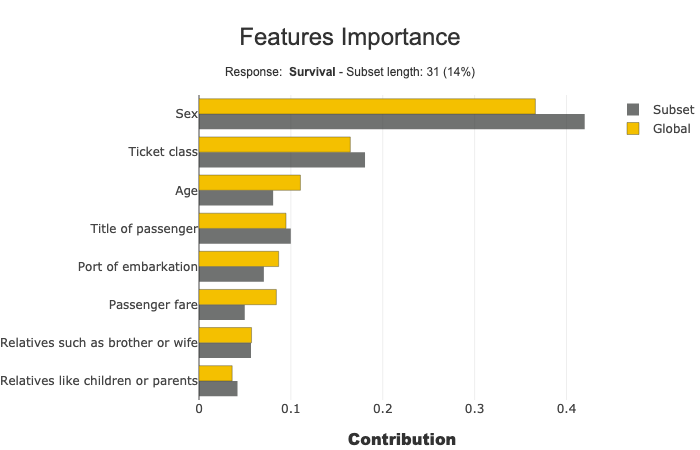

In [13]:
xpl.plot.features_importance(selection=sel)

## Tune the number of features to display

Use max_features parameter (default value: 20)

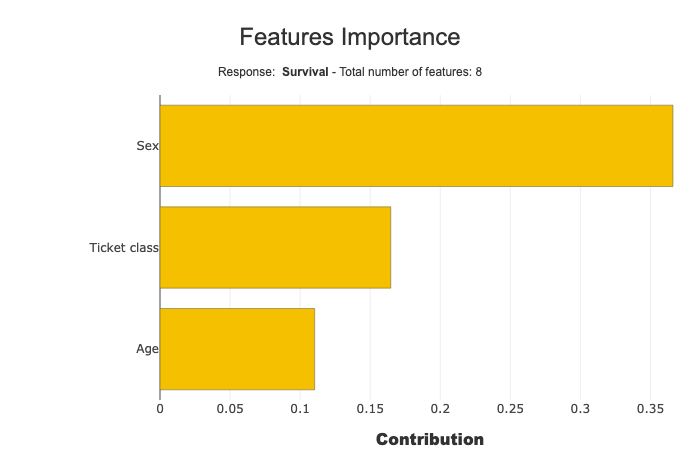

In [14]:
xpl.plot.features_importance(max_features=3)

## Understand local effect

### Comparing features globally
This plot allows us to observe how the importance of features varies across different subpopulations. For instance, we can see that in certain subpopulations, the **Port of Embarkation** has a greater impact than the **Ticket Class**, highlighting the local variations in feature significance.

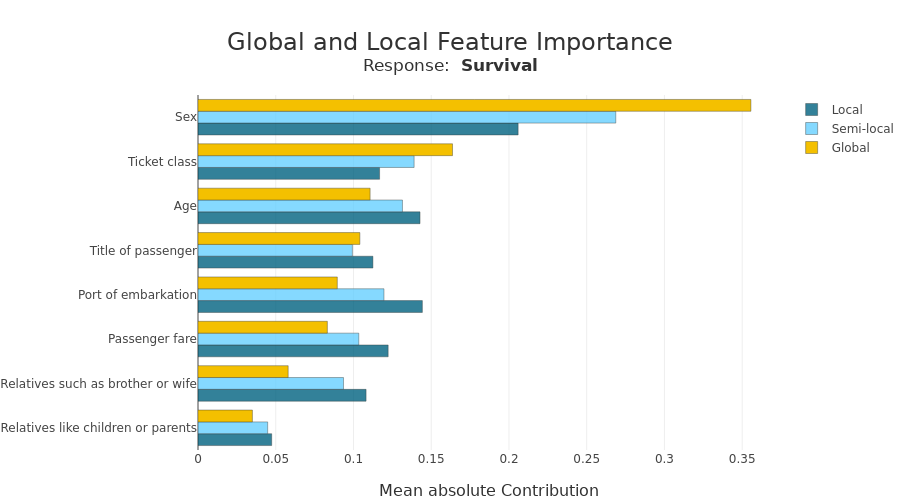

In [15]:
xpl.plot.features_importance(mode='global-local', max_features=10, zoom=True)

### Comparing the features by their shapeley values curves
In the plot below, we observe the same effect as before. For example, in certain subpopulations, the **Port of Embarkation** has a greater impact than the **Ticket Class**. This offers another way to visualize feature importance both locally and globally.

When the curves cross each other, it indicates that one feature has a higher local effect in a specific subpopulation, but a lower global impact across the entire dataset. On the other hand, if a curve consistently remains higher than another, it signifies that the feature is more important both globally and locally.

After this initial analysis, you can use the contribution plot to gain deeper insights into how a particular feature influences the model's predictions.

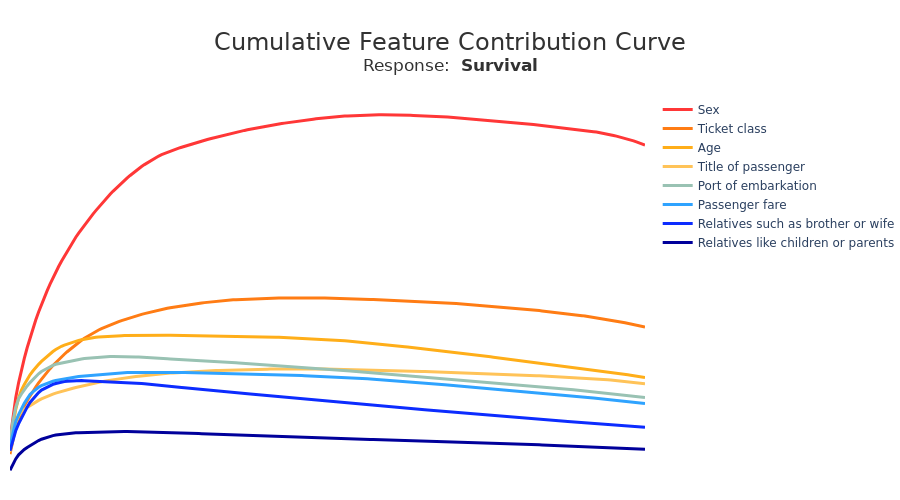

In [16]:
xpl.plot.features_importance(mode='cumulative', normalize_by_nb_samples=True, degree=-0.7, zoom=True)